<a href="https://colab.research.google.com/github/ali-workshop/data_sential_part_II_using_machine_learning_algorithms_ML_Pipline/blob/main/data_sential_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Abstract:

Data security is a critical concern in the modern digital landscape, with organizations striving to protect sensitive information from unauthorized access and breaches. This code explores the application of Support Vector Machines (SVM) and GBoost ,and otherpowerful machine learning techniques, in the context of data security.
Support Vector Machines (SVM) are widely employed for anomaly detection in data sets, making them a valuable tool in data security. SVMs excel at classifying data points into normal and anomalous categories, making them particularly suitable for identifying unusual patterns that may indicate security breaches or data leaks. This method leverages a hyperplane to maximize the margin between normal and anomalous data points, resulting in a robust and effective anomaly detection system.
GBoost, on the other hand, is an ensemble learning algorithm known for its exceptional predictive performance in classification tasks. In the realm of data security, GBoost can be applied for various purposes, such as intrusion detection and threat prediction. By combining the outputs of multiple decision trees, GBoost can capture complex relationships in data, enabling it to identify potential security threats with high accuracy..


#download libraries

In [ ]:
!pip install opendatasets

#import libraries

In [ ]:
import opendatasets as od
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#download data

In [ ]:
# {"username":"alolaa","key":"3005312b0970f031f097cc03c3ac0319"}

od.download(
    "https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list")

Skipping, found downloaded files in "./data-breaches-a-comprehensive-list" (use force=True to force download)


#read data

In [ ]:
data = pd.read_csv("/content/data-breaches-a-comprehensive-list/df_1.csv")
data.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


#explore the dataset

In [ ]:
# Exploratory on dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,352.0,175.5,101.757883,0.0,87.75,175.5,263.25,351.0


In [ ]:
data.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

In [ ]:
data.isna().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

#make some preprocessing on the data

In [ ]:
data.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)


In [ ]:
data = data[data['Year'] != 200]
data.reset_index(drop=True, inplace=True)
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str[:4]
data['Year'] = data['Year'].astype(int)


In [ ]:
data.head()

,Id,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


#encode some columns for the machine learning algorithm

In [ ]:
le = LabelEncoder()
data['Entity'] = le.fit_transform(data['Entity'])
data['Organization type'] = le.fit_transform(data['Organization type'])
data['Sources'] = le.fit_transform(data['Sources'])

# plot the data correlation

<Axes: >

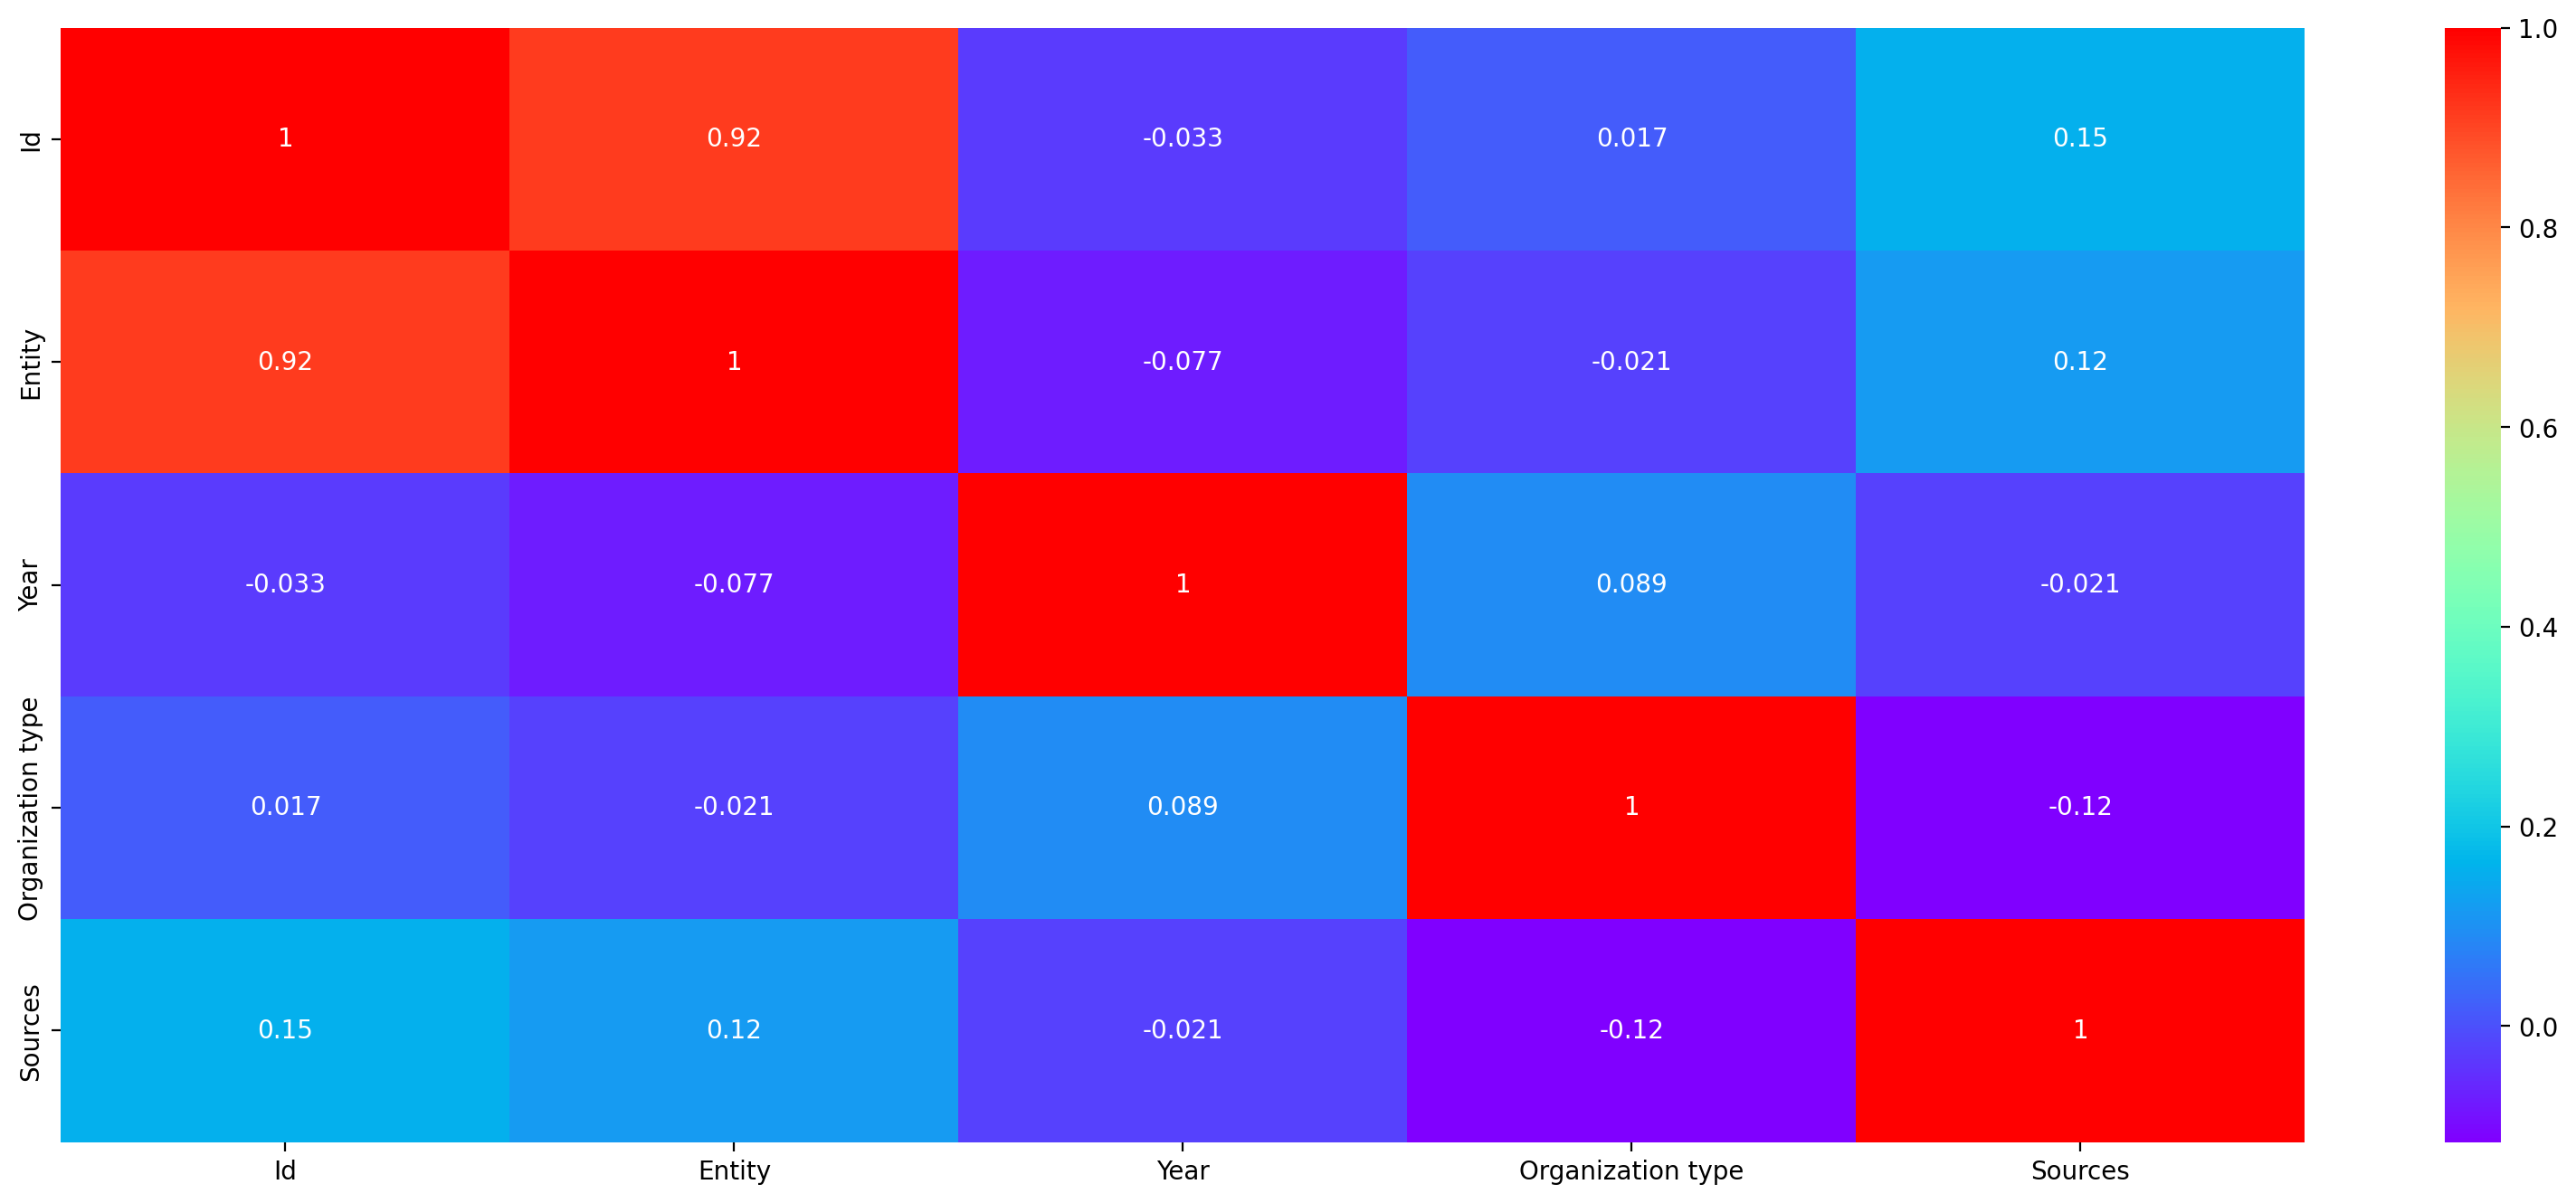

In [ ]:


plt.figure(figsize=(20,8),dpi=200,facecolor='w',edgecolor='k')
plt.rcParams['font.size'] = 10
sns.heatmap(data.corr(), annot=True, cmap='rainbow')

In [ ]:
data=data.dropna()

#print the count of each unique class

In [ ]:
data["Method"].value_counts()

hacked                                                  191
poor security                                            43
lost / stolen media                                      33
accidentally published                                   20
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

#Making three labels to be classified on and trying to achieve a kind of balance between classes and considering the types that bear a common label of a similar category in terms of the threat to the data

In [ ]:
mapping = {


    'hacked':1,
    'poor security': 2,
    'lost / stolen media': 2,
    'accidentally published': 2,
    'inside job': 2,
    'lost / stolen computer': 2 ,
    'unknown': 2,
    'improper setting, hacked': 2,
    'poor security/inside job': 2,
    'intentionally lost': 2,
    'accidentally exposed': 2,
    'publicly accessible Amazon Web Services (AWS) server': 2,
    'hacked/misconfiguration': 2,
    'rogue contractor': 2,
    'ransomware hacked': 2,
    'misconfiguration/poor security': 2,
    'unprotected api': 2,
    'zero-day vulnerabilities': 2,
    'data exposed by misconfiguration': 2,
    'Poor security': 2,
    'poor security / hacked': 2,
    'accidentally uploaded': 2,
    'unsecured S3 bucket': 2,
    'inside job, hacked': 2,
    'social engineering': 2,


}

data['Method'] = data['Method'].map(mapping)



# Function to check if a value can be converted to float
#we apply this function on the 'Records' column  to Avoid making an error during the scaling process

In [ ]:

def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Remove rows where records cannot be converted to float
data = data[data['Records'].apply(is_float)]

# Convert records to float
data['Records'] = data['Records'].astype(float)




In [ ]:

selected_features = ['Id','Organization type','Records']
X = data[selected_features]  # Features
y = data['Method']  # Target variable

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

#Scaling

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

#implement classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

# GBoost
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_scaled, y_train)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)
# Support Vector Machine (SVM)
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

# Logistic Regression (LR)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)

# Linear Discriminant Analysis (LDA)
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_scaled, y_train)



LinearDiscriminantAnalysis()

In [ ]:

# Step 3: Make predictions and evaluate classifiers
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

svm_accuracy, svm_report = evaluate_classifier(svm_classifier, X_test_scaled, y_test)
gb_accuracy, gb_report = evaluate_classifier(gb_classifier, X_test_scaled, y_test)
lr_accuracy, lr_report = evaluate_classifier(lr_classifier, X_test_scaled, y_test)
rf_accuracy, rf_report = evaluate_classifier(rf_classifier, X_test_scaled, y_test)
lda_accuracy, lda_report = evaluate_classifier(lda_classifier, X_test_scaled, y_test)




In [ ]:
# Print the evaluation results for each classifier
print("Logistic Regression Accuracy:", lr_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("RF Accuracy:", rf_accuracy)
print("LDA Accuracy:", lda_accuracy)
print("XGBoost Accuracy:", gb_accuracy)


Logistic Regression Accuracy: 0.8032786885245902
SVM Accuracy: 0.7213114754098361
RF Accuracy: 0.7377049180327869
LDA Accuracy: 0.8032786885245902
XGBoost Accuracy: 0.6885245901639344
